In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
currencies = pd.read_csv('All Currencies Table.csv')
currencies.head()

,Number,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),1h,24h,7d
0,1,Bitcoin,BTC,NaN,8940.74,1.685576e+07,8.103300e+09,-0.63,11.22,3.58
1,2,Ethereum,ETH,8.754697e+10,897.729,9.752049e+07,3.062570e+09,-0.41,11.99,-0.25
2,3,Ripple,XRP,4.062771e+10,1.04149,3.900922e+10,2.504810e+09,-0.37,32.86,23.94
3,4,Bitcoin Cash,BCH,2.294639e+10,1353.04,1.695914e+07,1.149550e+09,0.11,7.89,18.32
4,5,Cardano,ADA,1.163729e+10,0.448847,2.592707e+10,7.603720e+08,-0.71,27.62,23.61


In [3]:
print('The number of currencies is: ', len(currencies['Name'].unique()))

The number of currencies is:  1513


In [4]:
print(f'The dataset has a shape of {currencies.shape}')
print('\n')
print(f'The dataset has {currencies.isnull().sum().sum()} missing values')
print('\n')
print(f'The dataset has {currencies.duplicated().sum()} duplicated values')

The dataset has a shape of (1516, 10)


The dataset has 193 missing values


The dataset has 0 duplicated values


In [5]:
currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number              1516 non-null   int64  
 1   Name                1516 non-null   object 
 2   Symbol              1516 non-null   object 
 3   Market Cap          1515 non-null   float64
 4   Price               1516 non-null   object 
 5   Circulating Supply  1484 non-null   float64
 6   Volume (24hr)       1509 non-null   float64
 7    1h                 1452 non-null   float64
 8    24h                1465 non-null   float64
 9    7d                 1478 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 118.6+ KB


In [6]:
currencies.fillna(0, inplace=True)

# EDA

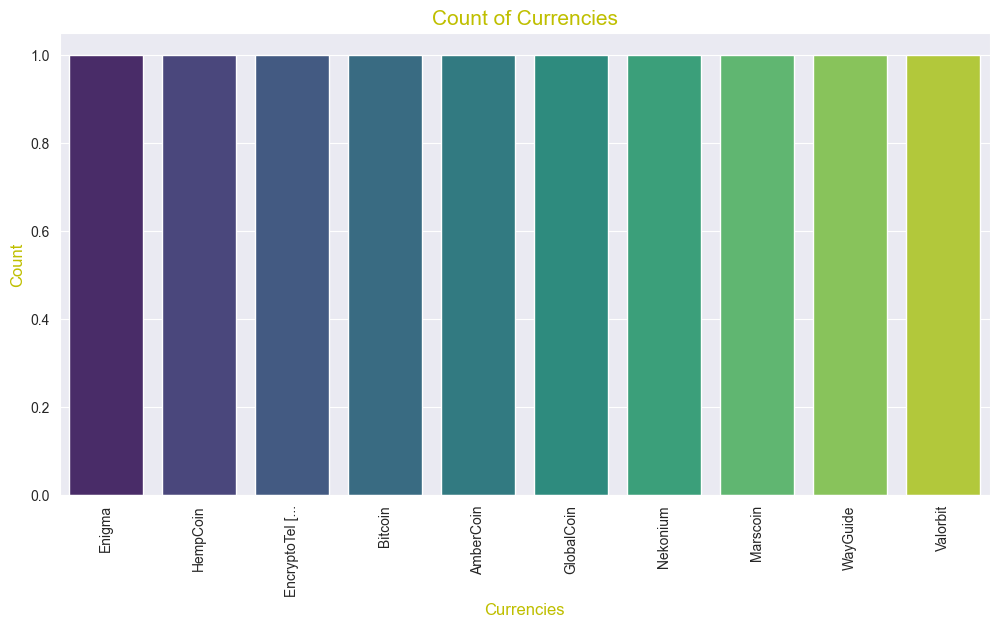

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x=currencies['Name'].value_counts().head(10).index, data=currencies, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Currencies', fontsize=12, c='y')
plt.ylabel('Count', fontsize=12, c='y')
plt.title('Count of Currencies', fontsize=15, c='y')
plt.show();

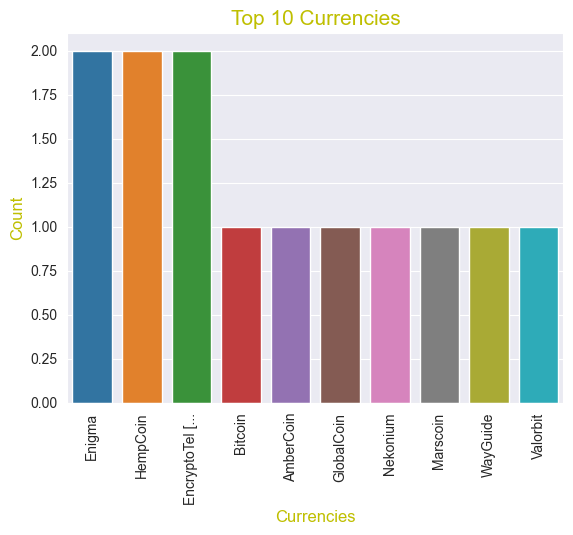

In [8]:
currencies['Name'].value_counts().head(10)
sns.barplot(x=currencies['Name'].value_counts().head(10).index, y=currencies['Name'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.xlabel('Currencies', fontsize=12, c='y')
plt.ylabel('Count', fontsize=12, c='y')
plt.title('Top 10 Currencies', fontsize=15, c='y')
plt.show();

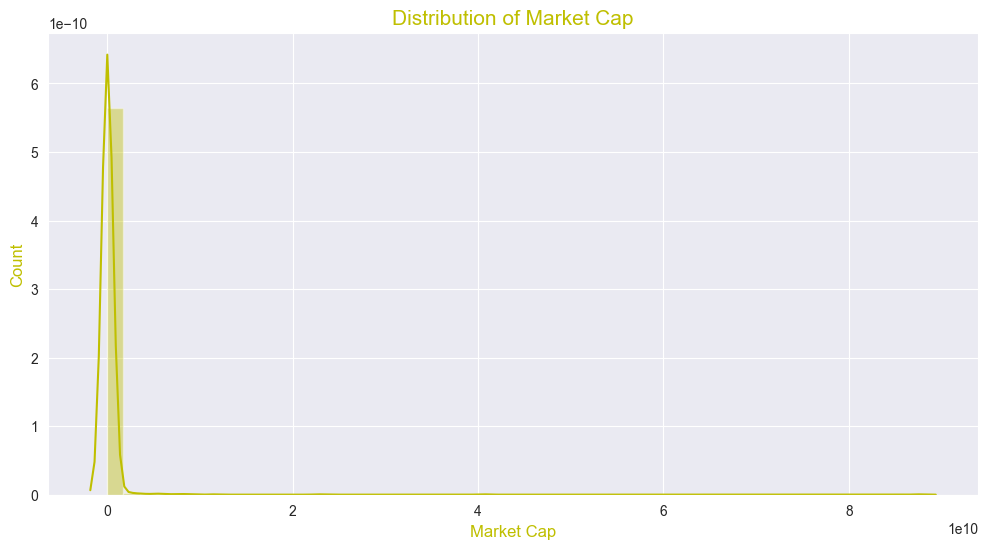

In [9]:
# Market cap
plt.figure(figsize=(12, 6))
sns.distplot(currencies['Market Cap'], color='y')
plt.xlabel('Market Cap', fontsize=12, c='y')
plt.ylabel('Count', fontsize=12, c='y')
plt.title('Distribution of Market Cap', fontsize=15, c='y')
plt.show();

### From the graph, we can see it is skewed to the left, we will have to apply log transformation to make it more normal

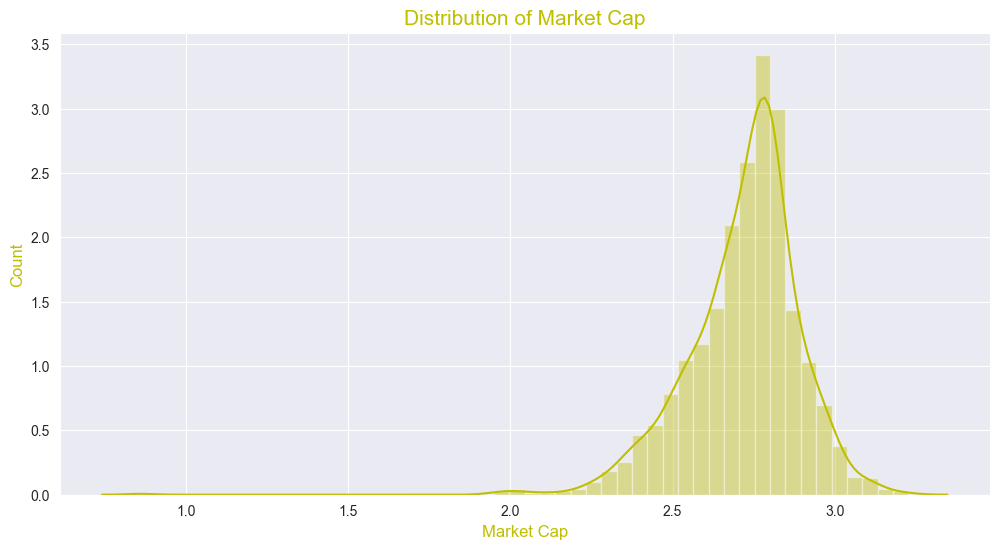

In [11]:
currencies['Market Cap'] = np.log(currencies['Market Cap'].astype('float64'))
plt.figure(figsize=(12, 6))
sns.distplot(currencies['Market Cap'], color='y')
plt.xlabel('Market Cap', fontsize=12, c='y')
plt.ylabel('Count', fontsize=12, c='y')
plt.title('Distribution of Market Cap', fontsize=15, c='y')
plt.show();


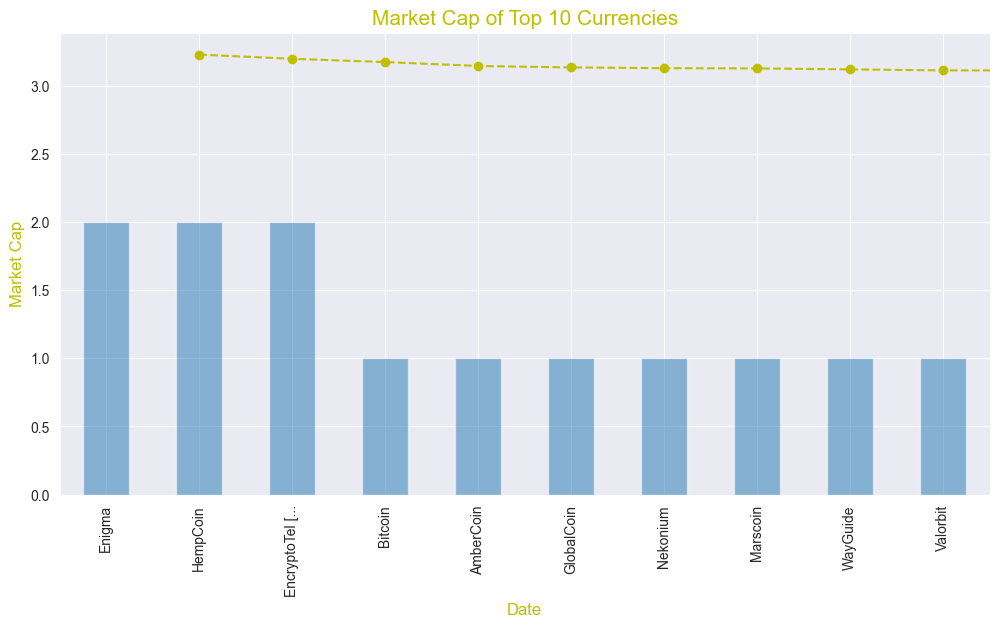

In [12]:
x = currencies['Market Cap'] # represents 
plt.plot(x.index, x.values, marker='o', linestyle='--', color='y', label='Market Cap')
currencies['Name'].value_counts().head(10).plot(kind='bar', style='b', alpha=0.5, figsize=(12, 6), rot=90)
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=12, c='y')
plt.ylabel('Market Cap', fontsize=12, c='y')
plt.title('Market Cap of Top 10 Currencies', fontsize=15, c='y')
plt.show();

In [13]:
currencies['Price'].describe()

count            1516
unique           1396
top       0.000177143
freq               20
Name: Price, dtype: object

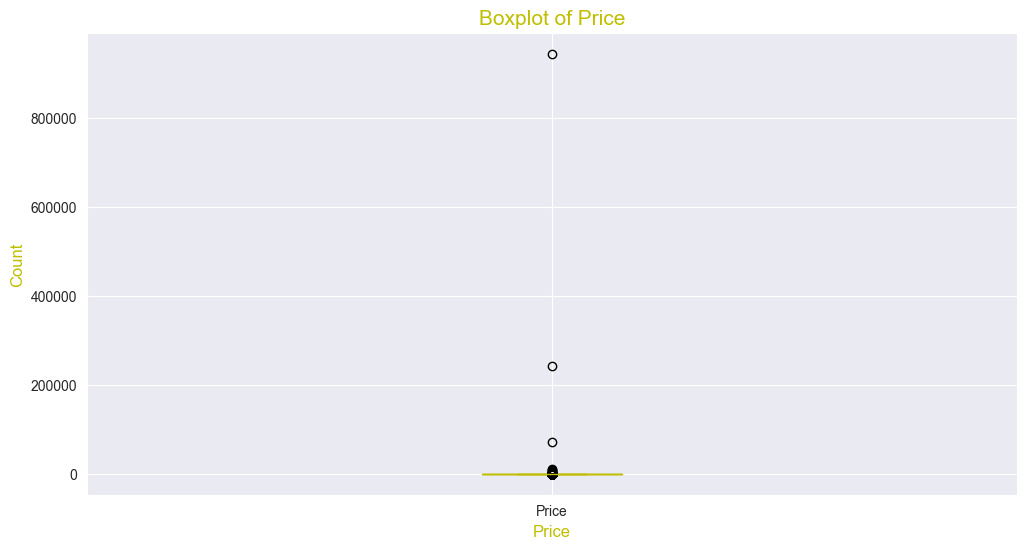

In [14]:
# replace '?' with NaN
currencies = currencies.replace('?', np.nan)

# convert Price column to float
currencies['Price'] = currencies['Price'].astype('float64')

# plot boxplot
currencies['Price'].plot(kind='box', figsize=(12, 6), color='y')
plt.xlabel('Price', fontsize=12, c='y')
plt.ylabel('Count', fontsize=12, c='y')
plt.title('Boxplot of Price', fontsize=15, c='y')
plt.show();

      Number              Name Symbol  Market Cap       Price   
0          1           Bitcoin    BTC         NaN  8940.74000  \
1          2          Ethereum    ETH    3.226663   897.72900   
3          4      Bitcoin Cash    BCH    3.172054  1353.04000   
5          6          Litecoin    LTC    3.132559   165.17900   
7          8               NEO    NEO    3.125431   119.08200   
...      ...               ...    ...         ...         ...   
1387    1388         Sand Coin    SND    2.735629     2.31993   
1392    1393              STEX   STEX    2.731501     1.90688   
1397    1398          Compcoin    CMP    2.729792    13.74940   
1462    1463            XDE II   XDE2    2.680902     4.30970   
1515    1516  Decentralized...   DUBI    2.651145   123.81300   

      Circulating Supply  Volume (24hr)     1h    24h     7d  
0           1.685576e+07   8.103300e+09  -0.63  11.22   3.58  
1           9.752049e+07   3.062570e+09  -0.41  11.99  -0.25  
3           1.695914e+07   1.1

<Axes: xlabel='Price'>

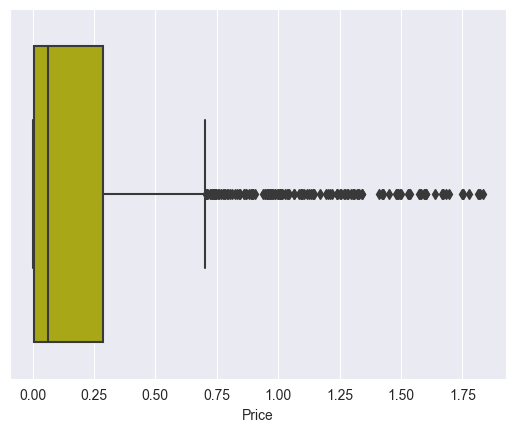

In [15]:
# Handle outliers in price
# calculate the IQR
Q1 = currencies['Price'].quantile(0.25)
Q3 = currencies['Price'].quantile(0.75)
IQR = Q3 - Q1
 # calculate the outlier cut off
cut_off = IQR * 1.5
 # calculate lower and upper bounds
lower, upper = Q1 - cut_off, Q3 + cut_off
# identify outliers
outliers = currencies[(currencies['Price'] < lower) |(currencies['Price'] > upper)]
print(outliers)

# remove outliers
currencies = currencies[(currencies['Price'] > lower) & (currencies['Price'] < upper)]

sns.boxplot(x=currencies['Price'], color='y')

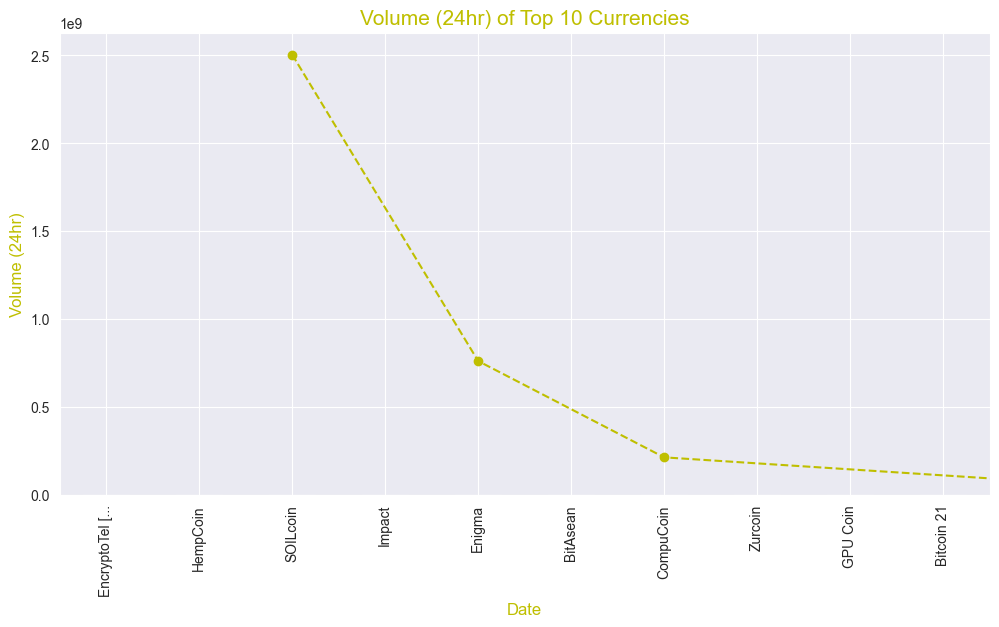

In [25]:
y = currencies['Volume (24hr)']
plt.plot(y.index, y.values, marker='o', linestyle='--', color='y', label='Volume (24hr)')
currencies['Name'].value_counts().head(10).plot(kind='bar', style='t', alpha=0.5, figsize=(12, 6), rot=90)
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=12, c='y')
plt.ylabel('Volume (24hr)', fontsize=12, c='y')
plt.title('Volume (24hr) of Top 10 Currencies', fontsize=15, c='y')
plt.show();

In [28]:
currencies.head()

,Number,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),1h,24h,7d
2,3,Ripple,XRP,3.195718,1.041490,3.900922e+10,2.504810e+09,-0.37,32.86,23.94
4,5,Cardano,ADA,3.143181,0.448847,2.592707e+10,7.603720e+08,-0.71,27.62,23.61
6,7,Stellar,XLM,3.127137,0.436583,1.843220e+10,2.120320e+08,0.05,21.88,14.83
10,11,NEM,XEM,3.110444,0.612945,9.000000e+09,7.526560e+07,-0.73,14.66,10.43
13,14,TRON,TRX,3.090610,0.054008,6.574819e+10,4.622720e+08,-0.79,51.31,40.50


In [30]:
currencies.columns

Index(['Number', 'Name', 'Symbol', 'Market Cap', 'Price', 'Circulating Supply',
       'Volume (24hr)', ' 1h', ' 24h', ' 7d'],
      dtype='object')

Text(0.5, 0, 'Volume (24hr)')

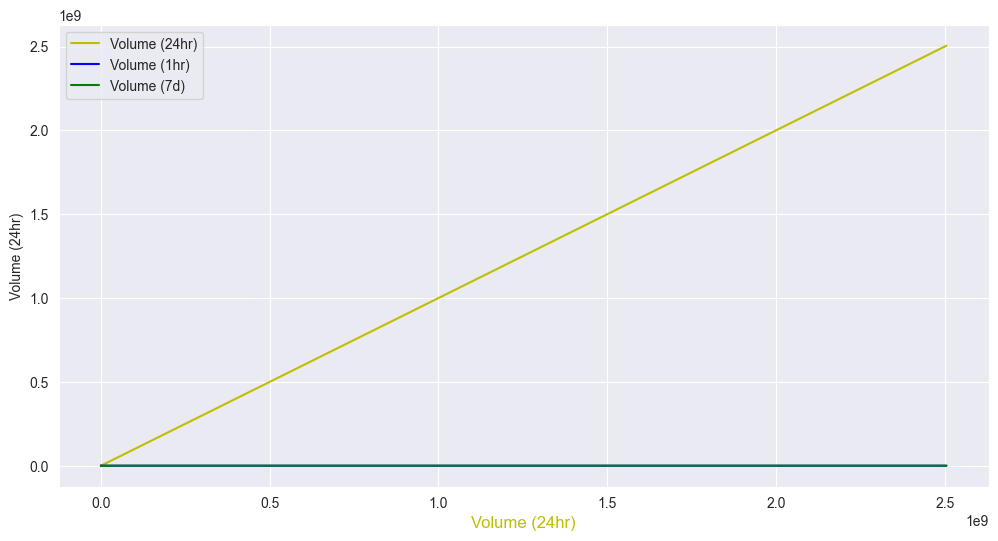

In [34]:
# 1h v 24h v 7d volume traded
plt.figure(figsize=(12, 6))
sns.lineplot(x=currencies['Volume (24hr)'], y=currencies['Volume (24hr)'], color='y', label='Volume (24hr)')
sns.lineplot(x=currencies['Volume (24hr)'], y=currencies[' 1h'], color='b', label='Volume (1hr)')
sns.lineplot(x=currencies['Volume (24hr)'], y=currencies[' 7d'], color='g', label='Volume (7d)')
plt.xlabel('Volume (24hr)', fontsize=12, c='y')
plt.ylabel('Volume (24hr)', fontsize=12, c='y')
plt.title('Volume (24hr) v 1h v 7d', fontsize=15, c='y')
plt.show();

<Axes: xlabel='Circulating Supply', ylabel='Price'>

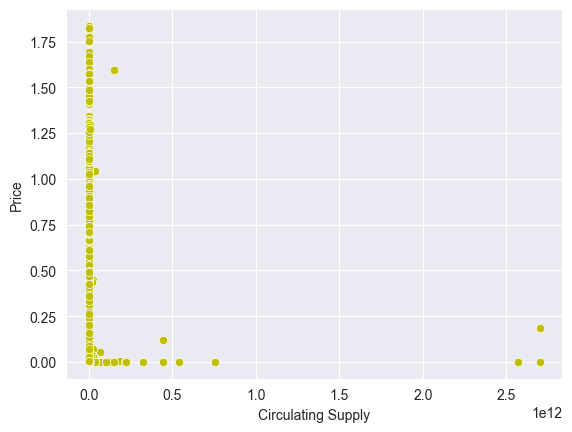

In [35]:
# Circulating Supply v Price
sns.scatterplot(x=currencies['Circulating Supply'], y=currencies['Price'], color='y')

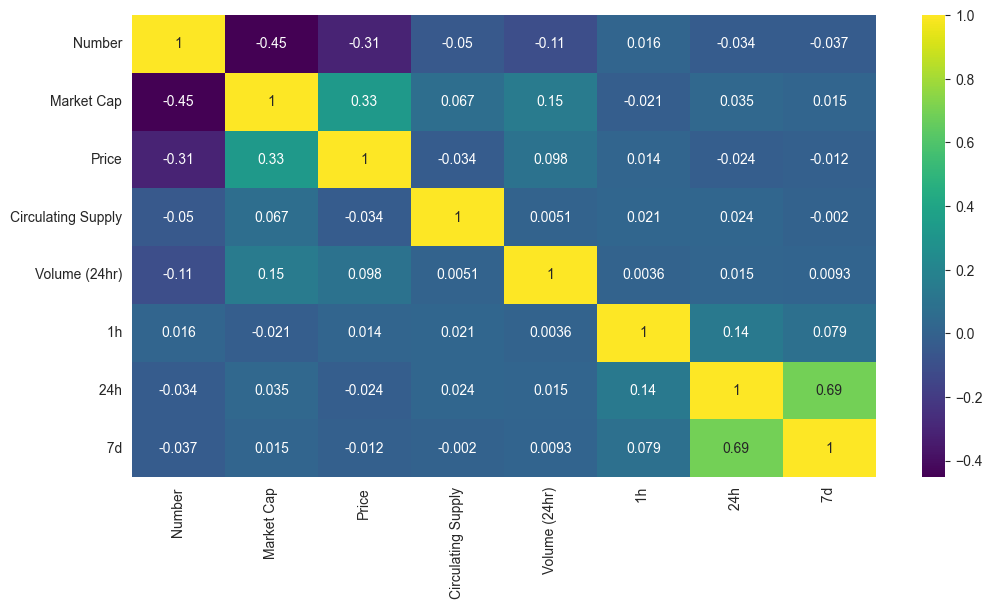

In [37]:
# Correlation matrix
corr = currencies.select_dtypes('number').corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show();

0.22480665913188425
Coefficients: 
 [ 0.11962916  0.02180035 -0.02174201]
Mean squared error: 0.15
Coefficient of determination: 0.10


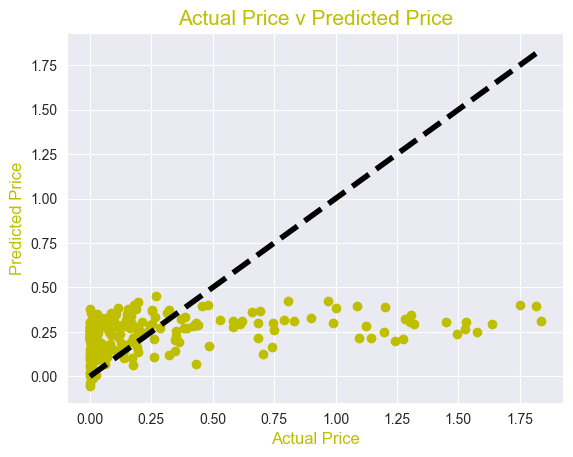

In [42]:
# Modelling
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = currencies[['Market Cap', 'Volume (24hr)', 'Circulating Supply', ' 1h', ' 24h', ' 7d']]
# Input X contains NaN
# Dropping nan values
X = X.dropna()

# Defining output
y = currencies['Price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

# Making predictions
lr_y_pred = lr.predict(X_test)
print(lr_y_pred[0])

# Evaluating the model
print('Coefficients: \n', lr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, lr_y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, lr_y_pred))

# Plotting the model
plt.scatter(y_test, lr_y_pred, color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price', fontsize=12, c='y')
plt.ylabel('Predicted Price', fontsize=12, c='y')
plt.title('Actual Price v Predicted Price', fontsize=15, c='y')
plt.show();

0.0532304
Mean squared error: 0.13
Coefficient of determination: 0.23


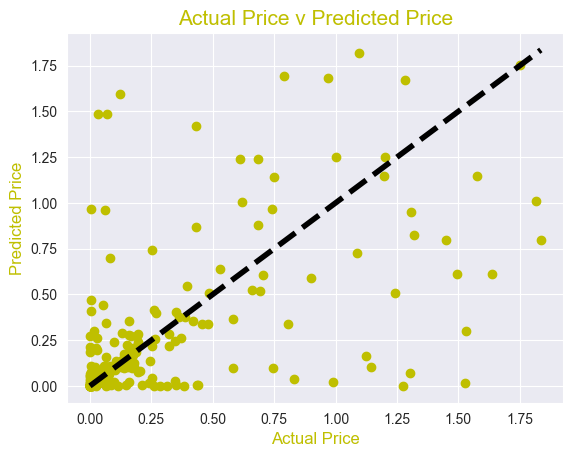

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fitting the model
dt.fit(X_train, y_train)

# Making predictions
dt_y_pred = dt.predict(X_test)
print(dt_y_pred[0])

# Evaluating the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, dt_y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, dt_y_pred))

# Plotting the model
plt.scatter(y_test, dt_y_pred, color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price', fontsize=12, c='y')
plt.ylabel('Predicted Price', fontsize=12, c='y')
plt.title('Actual Price v Predicted Price', fontsize=15, c='y')
plt.show();

0.2934529468000001
Mean squared error is 0.07
Coefficient of determination is 0.58


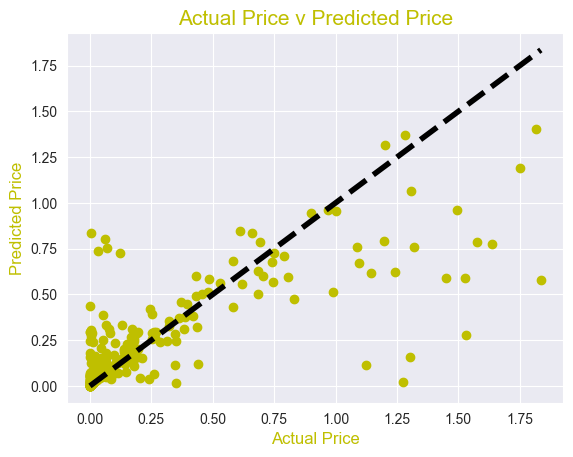

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(X_train, y_train)

# Making predictions
rf_y_pred = rf.predict(X_test)
print(rf_y_pred[0])

# Evaluating the model
print('Mean squared error is %.2f' % mean_squared_error(y_test, rf_y_pred))
print('Coefficient of determination is %.2f' % r2_score(y_test, rf_y_pred))

# Plotting the model
plt.scatter(y_test, rf_y_pred, color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price', fontsize=12, c='y')
plt.ylabel('Predicted Price', fontsize=12, c='y')
plt.title('Actual Price v Predicted Price', fontsize=15, c='y')
plt.show();


                                              0.0/70.9 MB ? eta -:--:--
                                              0.0/70.9 MB ? eta -:--:--
                                              0.2/70.9 MB 2.0 MB/s eta 0:00:37
                                              0.3/70.9 MB 2.1 MB/s eta 0:00:34
                                              0.5/70.9 MB 2.2 MB/s eta 0:00:33
                                              0.8/70.9 MB 3.1 MB/s eta 0:00:23
                                              1.3/70.9 MB 4.1 MB/s eta 0:00:18
                                              1.7/70.9 MB 4.8 MB/s eta 0:00:15
                                              1.7/70.9 MB 4.8 MB/s eta 0:00:15
                                              1.7/70.9 MB 4.8 MB/s eta 0:00:15
     -                                        2.2/70.9 MB 4.3 MB/s eta 0:00:16
     -                                        2.5/70.9 MB 4.6 MB/s eta 0:00:15
     -                                        3.3/70.9 MB 5.5 MB/s

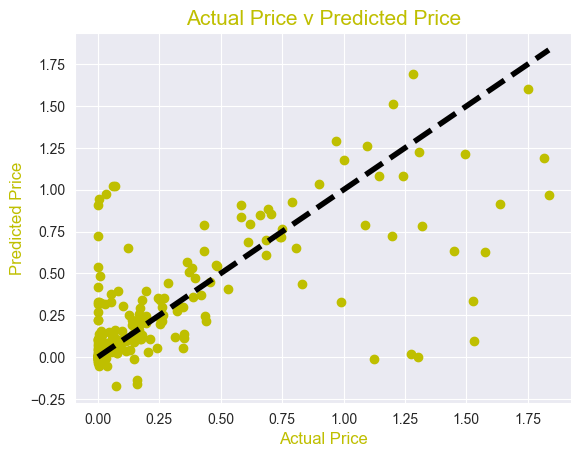

In [45]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

# Fitting the model
xgb.fit(X_train, y_train)

# Making predictions
xgb_y_pred = xgb.predict(X_test)
print(xgb_y_pred[0])

# Evaluating the model
print('Mean squared error is %.2f' % mean_squared_error(y_test, xgb_y_pred))
print('Coefficient of determination is %.2f' % r2_score(y_test, xgb_y_pred))

# Plotting the model
plt.scatter(y_test, xgb_y_pred, color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price', fontsize=12, c='y')
plt.ylabel('Predicted Price', fontsize=12, c='y')
plt.title('Actual Price v Predicted Price', fontsize=15, c='y')
plt.show();